In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

K-Means 알고리즘을 구현하기 전에 이번 포스팅에서는 sklearn 에서 제공하는 데이터셋인 Iris(붓꽃) Dataset 을 활용하도록 하겠습니다. 위 데이터셋은 붓꽃의 서로 다른 3가지 종(setosa, versicolor, virginica)의 sepal(꽃받침), petal(꽃잎) feature를 포함하고 있습니다.

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data

여기서 각 row는 하나의 데이터 sample 을 나타냅니다. 각 column은 feature를 나타내며 순서대로 sepal length(꽃받침의 길이), sepal width(꽃받침의 넓이), petal length(꽃잎의 길이), petal width(꽃잎의 넓이) 를 의미합니다. 이렇게 load한 데이터는 Bunch 라는 객체로 생성됩니다. 이 객체의 속성으로 .data 이외에 데이터의 label인 .target 과 데이터에 대한 설명인 .DESCR 등이 있으며, 자세한 설명은 공식 Document를 참조하시기 바랍니다.

이번 포스팅에서는 sepal length와 width 두 가지 feature만을 고려하도록 하겠습니다. 데이터로부터 두 feature만을 뽑아내어 산점도를 그려보도록 하곘습니다. x축이 length를, y축이 width를 나타냅니다.

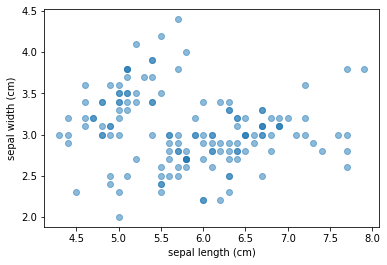

In [5]:
from matplotlib import pyplot as plt
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

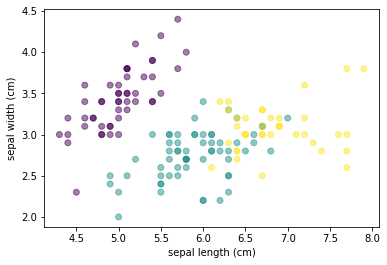

In [15]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()
samples = iris.data
# 3개의 그룹으로 나누는 K-Means 모델을 생성합니다
model = KMeans(n_clusters = 3)
model.fit(samples)
labels = model.predict(samples)
# 클러스터링 결과를 시각화합니다
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Evaluation
지금까지 Iris 데이터를 3가지 서로 다른 그룹으로 클러스터링 하는 것을 Python과 sklearn 을 활용하여 구현하였습니다. 그런데 과연 실제로 얼마나 많은 데이터를 올바르게 분류한 것일까요? 이를 확인해보도록 합시다.

# Cross Tabulation
Iris 데이터셋은 label이 포함되어 있습니다. 이는 target 이라는 내장 속성을 통해 접근할 수 있습니다.

In [17]:
target = iris.target

여기서 0 은 setosa, 1 은 versicolor, 그리고 2 는 virginica 를 나타냅니다. 이처럼 숫자로 나타낸 값들을 문자열로 변경해 주도록 합시다.

In [19]:
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
    if target[i] == 0:
        species[i] = 'setosa'
    elif target[i] == 1:
        species[i] = 'versicolor'
    elif target[i] == 2:
        species[i] = 'virginica'

In [20]:
import pandas as pd

df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0               50              0             0
1                0             48            14
2                0              2            36


위 표를 분석한 결과는 다음과 같습니다.

Setosa 는 100%의 정확도로 분류되었습니다.
Versicolor 는 96%의 정확도로 분류되었습니다.
Virginica 는 그다지 잘 분류되지 않았습니다.

# Number of Clusters

이번 포스팅에서 Iris 데이터를 3 개의 그룹으로 클러스터링 하였지만, 만약 데이터셋에서 종의 갯수가 주어지지 않는다면 어떻게 해야 할까요? 그런 경우 몇 개의 그룹으로 클러스터링 해야 하는지 어떻게 결정할 수 있을까요?

위 질문에 답변하기 전에 먼저 무엇이 ‘좋은’ 그룹인지 정의해야 합니다. 일단 그룹에 포함된 각 데이터 포인트들이 뭉쳐져 있을 경우 ‘좋은’ 그룹이라고 말할 수 있을 것입니다. 그룹에 포함된 데이터들이 퍼져있는 정도를 inertia 라고 하는데, Inertia는 각 클러스터의 중심인 centroid와 각 데이터들 사이의 거리를 나타냅니다. 즉, Inertia가 낮은 그룹을 ‘좋은’ 그룹이라 할 수 있고, 이러한 그룹을 적게 만들수록 좋은 모델이라고 할 수 있습니다.

KMeans 객체는 내부적으로 .inertia_ 속성을 가지고 있습니다. KMeans 모델을 생성할 때 num_clusters 옵션을 다르게 부여하면서 inertia를 비교하는 방법은 다음과 같습니다.



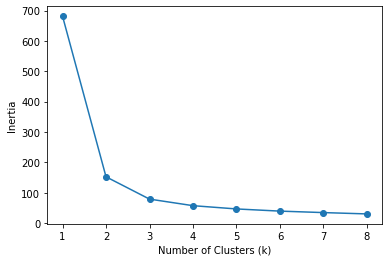

In [21]:
num_clusters = list(range(1, 9))	# K는 1 ~ 8사이의 정수입니다
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

일반적으로 클러스터의 수가 증가할 수록 inertia는 감소하게 됩니다. 궁극적으로 클러스터의 수와 inertia간의 trade-off가 발생하게 됩니다. 우리의 목표는 inertia를 최소화 시키면서 동시에 클러스터의 수를 최소화 시키는 것입니다. 이 때 최적의 클러스터 수를 결정하는 한 가지 방법은 ‘elbow’ 메소드 입니다.

Elbow 메소드란 위 그래프를 사람의 팔로 간주하고, 팔꿈치 부분에 해당하는 클러스터 갯수를 선택하는 것을 말합니다. 즉 inertia가 감소하는 정도가 낮아지는 지점을 찾으면 됩니다. 위 그래프에서는 3 이 가장 최적의 클러스터의 수 라고 말할 수 있습니다.